In [120]:

%matplotlib widget
# Load packages and settings
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.min_rows', 50)
import seaborn as sns

import geopandas as gpd

import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams["image.cmap"] = "tab10"
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.tab10.colors)
fs_label = 16
parameters = {
                'axes.labelsize': fs_label,
                'axes.titlesize': fs_label+4,
                'xtick.labelsize': fs_label,
                'ytick.labelsize': fs_label, 
                'legend.fontsize': fs_label, 
                'lines.markersize': 10,
                'lines.linewidth': 3
             }
plt.rcParams.update(parameters)

from matplotlib import cm # Colormaps
import matplotlib.colors as colors
# cmap = plt.cm.get_cmap('Dark2',len(ageGroups))

import locale
import matplotlib.dates as mdates
locale.setlocale(locale.LC_TIME,"Danish")
# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
# ax1.spines['top'].set_visible(False) 

from mpl_toolkits.axes_grid1 import make_axes_locatable

import os
# import csv
import math

from datetime import date

import sys
sys.path.append("./../scripts")
import PandemiXFunctions as pf


saveFigures = True
# saveFigures = False
print('saveFigures is set to: '+str(saveFigures))

print('Done loading packages')

# # Define running mean functions
# def rnMean(data,meanWidth):
#     return np.convolve(data, np.ones(meanWidth)/meanWidth, mode='valid')
# def rnTime(t,meanWidth):
#     return t[math.floor(meanWidth/2):-math.ceil(meanWidth/2)+1]

saveFigures is set to: True
Done loading packages


In [2]:
# Define paths
rootdir_data = os.getcwd() +"/../DanskeData/" 

path_data = rootdir_data + "ssi_data/"
path_dash = rootdir_data + "ssi_dashboard/"
path_vacc = rootdir_data + "ssi_vacc/"
path_figs = os.getcwd() +"/../Figures/" 

# path_figs = path_figs + "Immunity_SSI\\"

In [106]:
latestsubdir = list(os.walk(path_data))[0][1][-1]
latestdir = path_data + latestsubdir

dfCase = pd.read_csv(latestdir+'/Municipality_cases_time_series.csv',delimiter = ';')
dfCase['SampleDate'] = pd.to_datetime(dfCase['SampleDate'])
dfTest = pd.read_csv(latestdir+'/Municipality_tested_persons_time_series.csv',delimiter = ';')
dfTest['PrDate_adjusted'] = pd.to_datetime(dfTest['PrDate_adjusted'])

dfCur = pd.read_csv(latestdir+'/Municipality_test_pos.csv',delimiter = ';',thousands='.')
dfCur

dfTest = dfTest.loc[dfTest['PrDate_adjusted'] >= dfCase.SampleDate[0]]

dfTest = dfTest.loc[dfTest['PrDate_adjusted'] != np.datetime64('2020-02-29')]

In [107]:
# dfCur

In [108]:
gdf = gpd.read_file(rootdir_data+'Kommune\\Kommune.shp')

# Only use most recent mapdata
gdf = gdf[gdf.til == np.max(gdf.til.unique())]

In [109]:
def getGeo(curKom):
    if (curKom == 'Aabenraa'):
        curKom = 'Åbenrå'
    if (curKom == 'Nordfyn'):
        curKom = 'Nordfyns'
    if (curKom == 'København'):
        curKom = 'Københavns'
    if (curKom == 'Bornholm'):
        curKom = 'Bornholms'
    if (curKom == 'Faaborg-Midtfyn'):
        curKom = 'Fåborg-Midtfyn'
    if (curKom == 'Lyngby-Taarbæk'):
        curKom = 'Lyngby-Tårbæk'

    if (curKom == 'Copenhagen'):
        curKom = 'Københavns'

    curgdf = gdf[gdf.navn == (curKom+' Kommune')]
    return curgdf

In [110]:
dfPosPct = pd.DataFrame() 

dfPosPct['Date'] = dfCase.SampleDate 

allMunis = dfCase.columns[1:]

for curKom in allMunis:
    curCase = dfCase[curKom]
    curTest = dfTest[curKom]

    curPct = curCase.values/curTest.values

    dfPosPct[curKom] = curPct


C:\Users\rakrpe\AppData\Local\Temp\ipykernel_15252\1834952195.py:11: RuntimeWarning: invalid value encountered in true_divide
  curPct = curCase.values/curTest.values
C:\Users\rakrpe\AppData\Local\Temp\ipykernel_15252\1834952195.py:11: RuntimeWarning: invalid value encountered in true_divide
  curPct = curCase.values/curTest.values
C:\Users\rakrpe\AppData\Local\Temp\ipykernel_15252\1834952195.py:11: RuntimeWarning: invalid value encountered in true_divide
  curPct = curCase.values/curTest.values
C:\Users\rakrpe\AppData\Local\Temp\ipykernel_15252\1834952195.py:11: RuntimeWarning: invalid value encountered in true_divide
  curPct = curCase.values/curTest.values
C:\Users\rakrpe\AppData\Local\Temp\ipykernel_15252\1834952195.py:11: RuntimeWarning: invalid value encountered in true_divide
  curPct = curCase.values/curTest.values
C:\Users\rakrpe\AppData\Local\Temp\ipykernel_15252\1834952195.py:11: RuntimeWarning: invalid value encountered in true_divide
  curPct = curCase.values/curTest.value

In [111]:
curKom = 'Roskilde'


In [112]:
dfCase.tail()

,SampleDate,Roskilde,Copenhagen,Aarhus,Frederiksberg,Kalundborg,Middelfart,Gentofte,Solrød,Allerød,...,Struer,Brønderslev,Hedensted,Varde,Læsø,Ærø,Fanø,Samsø,NA,Christiansø
729,2022-02-25,227,1037,908,196,140,142,114,55,45,...,75,143,146,135,2,26,4,17,1,0
730,2022-02-26,170,908,856,139,74,100,102,24,72,...,60,146,133,87,1,44,5,1,0,0
731,2022-02-27,249,1082,1007,206,111,149,125,53,92,...,78,162,168,138,3,31,6,0,0,0
732,2022-02-28,230,1070,948,157,41,132,62,60,16,...,23,142,158,203,1,47,8,22,0,0
733,2022-03-01,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [128]:

curKom = 'Roskilde'
curPop = dfCur.loc[dfCur['Kommune_(navn)'] == curKom,'Befolkningstal'].values[0]
pf.rnTime(dfCase[curKom]/curPop).values[-1]

0.0019010131281730145

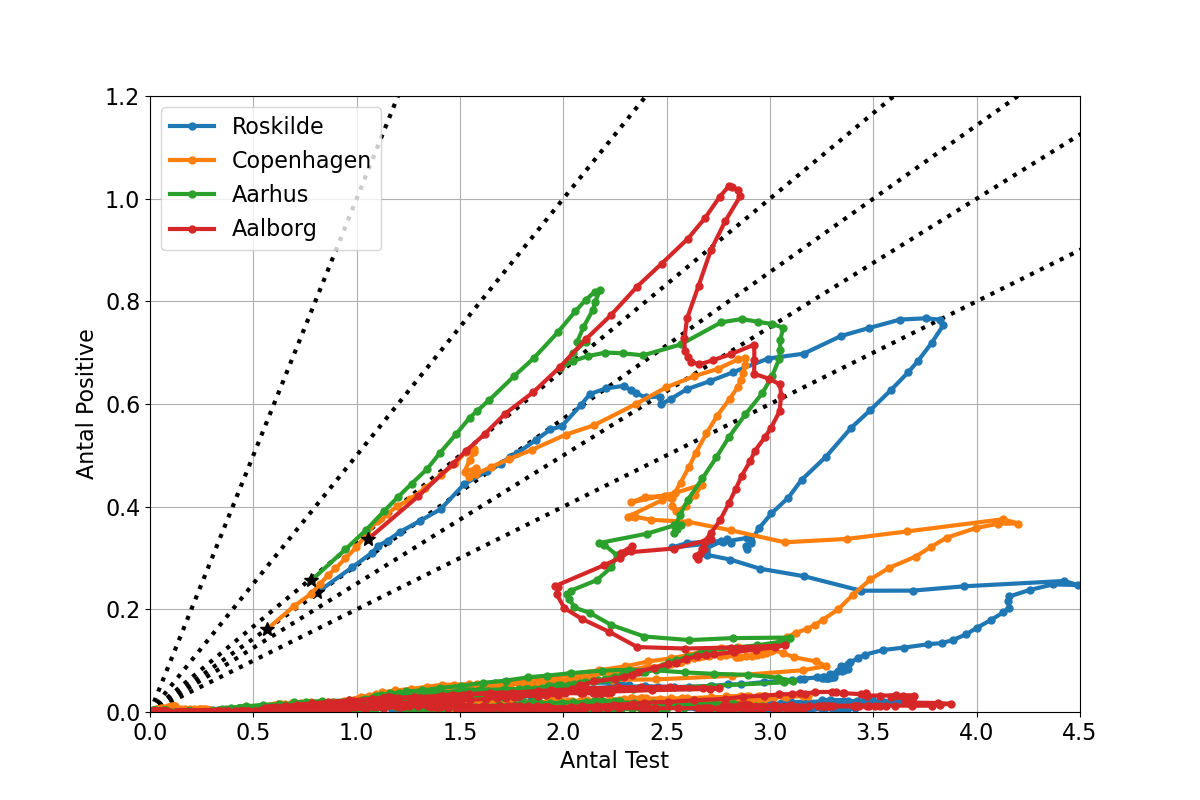

In [168]:
fig,ax1 = plt.subplots()

# ax1.plot(dfPosPct.Date,dfPosPct.Roskilde)
# ax1.plot(dfPosPct.Date,dfPosPct.Copenhagen)

# curKom = 'Roskilde'
# curPop = dfCur.loc[dfCur['Kommune_(navn)'] == curKom,'Befolkningstal'].values[0]
# ax1.plot(dfCase[curKom]/curPop,dfTest[curKom]/curPop)

ax1.plot(np.linspace(0,10),np.linspace(0,10),'k:')
ax1.plot(np.linspace(0,10),np.linspace(0,10)/2,'k:')
ax1.plot(np.linspace(0,10),np.linspace(0,10)/3,'k:')
ax1.plot(np.linspace(0,10),np.linspace(0,10)/3.5,'k:')
ax1.plot(np.linspace(0,10),np.linspace(0,10)/4,'k:')
ax1.plot(np.linspace(0,10),np.linspace(0,10)/5,'k:')

# curKom = 'Copenhagen'
komsToShow = ['Roskilde','Copenhagen','Aarhus','Aalborg']
for curKom in komsToShow:

    if (curKom == 'Copenhagen'):
        curPop = dfCur.loc[dfCur['Kommune_(navn)'] == 'København','Befolkningstal'].values[0]
    else: 
        curPop = dfCur.loc[dfCur['Kommune_(navn)'] == curKom,'Befolkningstal'].values[0]
        
    # ax1.plot(dfCase[curKom]/curPop,dfTest[curKom]/curPop)
    # ax1.plot(pf.rnTime(dfCase[curKom]/curPop),pf.rnMean(dfTest[curKom]/curPop))
    # ax1.plot(pf.rnTime(dfCase[curKom].values/curPop)[-1],pf.rnMean(dfTest[curKom]/curPop)[-1],'k*')

    ax1.plot(100*pf.rnMean(dfTest[curKom]/curPop),100*pf.rnMean(dfCase[curKom]/curPop),'.-',label=curKom)
    ax1.plot(100*pf.rnMean(dfTest[curKom]/curPop)[-1],100*pf.rnMean(dfCase[curKom]/curPop)[-1],'k*')
    # ax1.plot(100*pf.rnMean(dfTest[curKom]/curPop),pf.rnMean(dfPosPct[curKom]),'.-')
    # ax1.plot(100*pf.rnMean(dfTest[curKom]/curPop)[-1],pf.rnMean(dfPosPct[curKom])[-1],'k*')


ax1.set_ylim([0,1.2])
ax1.set_xlim([0,4.5])

ax1.grid()

ax1.set_xlabel('Antal Test')
ax1.set_ylabel('Antal Positive')
# ax1.plot(dfCase.Roskilde,dfTest.Roskilde)
# ax1.plot(dfCase.Copenhagen,dfTest.Copenhagen)
ax1.legend()

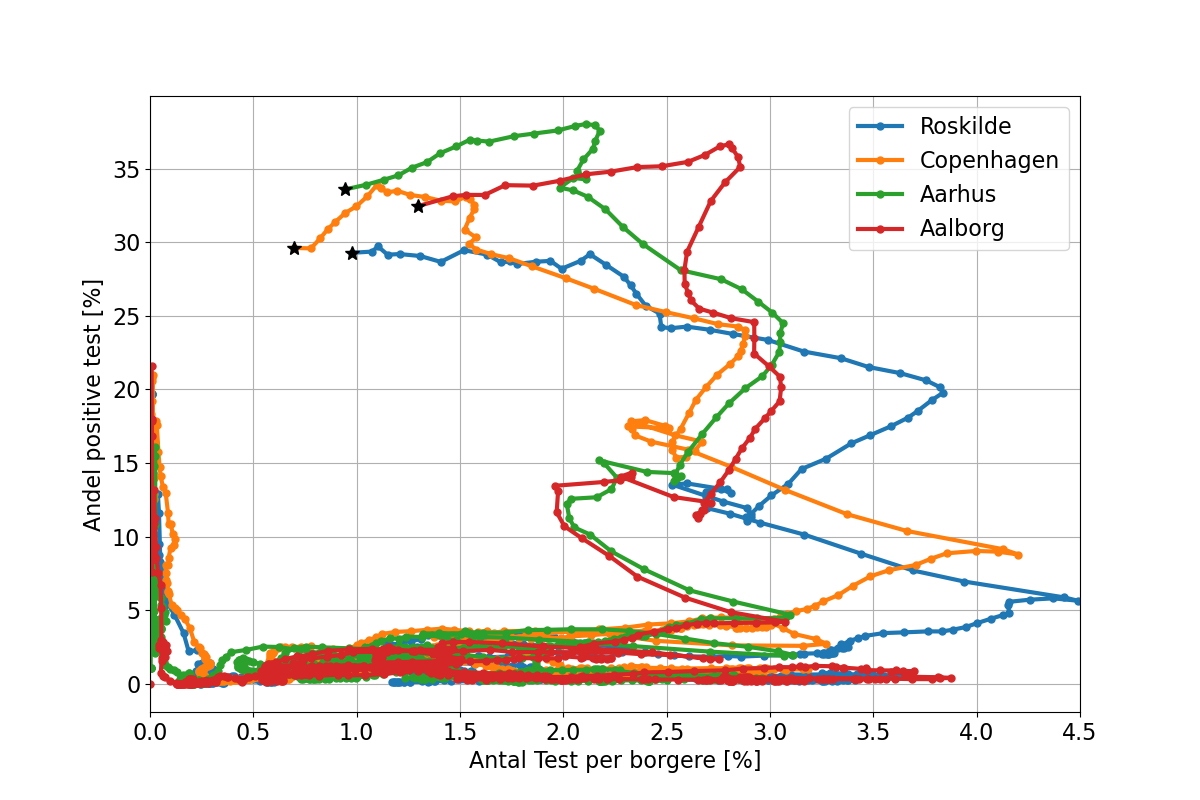

In [166]:
fig,ax1 = plt.subplots()

# ax1.plot(dfPosPct.Date,dfPosPct.Roskilde)
# ax1.plot(dfPosPct.Date,dfPosPct.Copenhagen)

# curKom = 'Roskilde'
# curPop = dfCur.loc[dfCur['Kommune_(navn)'] == curKom,'Befolkningstal'].values[0]
# ax1.plot(dfCase[curKom]/curPop,dfTest[curKom]/curPop)


# curKom = 'Copenhagen'
komsToShow = ['Roskilde','Copenhagen','Aarhus','Aalborg']
for curKom in komsToShow:

    if (curKom == 'Copenhagen'):
        curPop = dfCur.loc[dfCur['Kommune_(navn)'] == 'København','Befolkningstal'].values[0]
    else: 
        curPop = dfCur.loc[dfCur['Kommune_(navn)'] == curKom,'Befolkningstal'].values[0]
        
    # ax1.plot(dfCase[curKom]/curPop,dfTest[curKom]/curPop)
    # ax1.plot(pf.rnTime(dfCase[curKom]/curPop),pf.rnMean(dfTest[curKom]/curPop))
    # ax1.plot(pf.rnTime(dfCase[curKom].values/curPop)[-1],pf.rnMean(dfTest[curKom]/curPop)[-1],'k*')

    # ax1.plot(100*pf.rnMean(dfTest[curKom]/curPop),100*pf.rnMean(dfCase[curKom]/curPop),'.-')
    # ax1.plot(100*pf.rnMean(dfTest[curKom]/curPop)[-1],100*pf.rnMean(dfCase[curKom]/curPop)[-1],'k*')
    ax1.plot(100*pf.rnMean(dfTest[curKom]/curPop)[:-1],100*pf.rnMean(dfPosPct[curKom])[:-1],'.-',label=curKom)
    ax1.plot(100*pf.rnMean(dfTest[curKom]/curPop)[-2],100*pf.rnMean(dfPosPct[curKom])[-2],'k*')


# ax1.set_ylim([0,1.2])
ax1.set_xlim([0,4.5])

ax1.grid()

ax1.set_xlabel('Antal Test per borgere [%]')
ax1.set_ylabel('Andel positive test [%]')
# ax1.plot(dfCase.Roskilde,dfTest.Roskilde)
# ax1.plot(dfCase.Copenhagen,dfTest.Copenhagen)

ax1.legend()

C:\Users\rakrpe\AppData\Local\Temp\ipykernel_15252\3465059958.py:30: RuntimeWarning: divide by zero encountered in log
  ax1.plot(pf.rnTime(dfCase['SampleDate']).values[:-1],np.log(100*pf.rnMean(dfCase[curKom]/curPop)[:-1]),'.-',label=curKom)
C:\Users\rakrpe\AppData\Local\Temp\ipykernel_15252\3465059958.py:30: RuntimeWarning: divide by zero encountered in log
  ax1.plot(pf.rnTime(dfCase['SampleDate']).values[:-1],np.log(100*pf.rnMean(dfCase[curKom]/curPop)[:-1]),'.-',label=curKom)


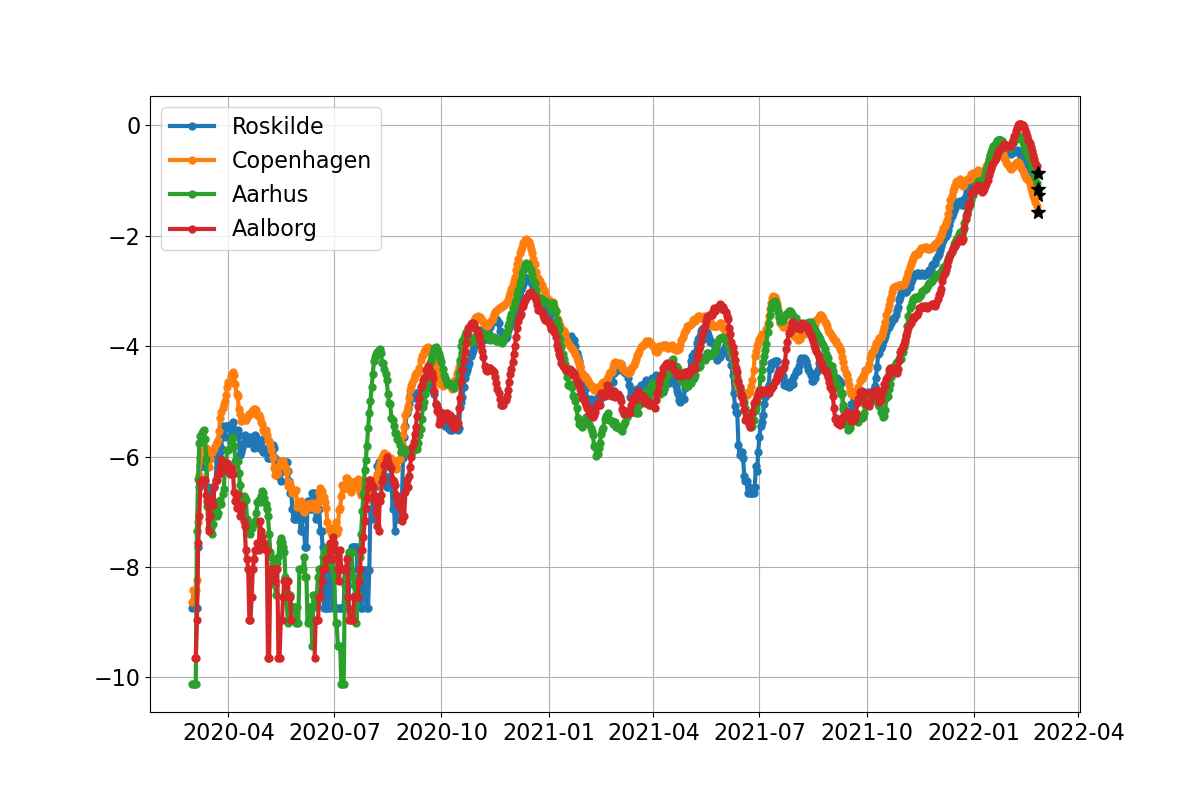

In [176]:
fig,ax1 = plt.subplots()

# ax1.plot(dfPosPct.Date,dfPosPct.Roskilde)
# ax1.plot(dfPosPct.Date,dfPosPct.Copenhagen)

# curKom = 'Roskilde'
# curPop = dfCur.loc[dfCur['Kommune_(navn)'] == curKom,'Befolkningstal'].values[0]
# ax1.plot(dfCase[curKom]/curPop,dfTest[curKom]/curPop)


# curKom = 'Copenhagen'
komsToShow = ['Roskilde','Copenhagen','Aarhus','Aalborg']
for curKom in komsToShow:

    if (curKom == 'Copenhagen'):
        curPop = dfCur.loc[dfCur['Kommune_(navn)'] == 'København','Befolkningstal'].values[0]
    else: 
        curPop = dfCur.loc[dfCur['Kommune_(navn)'] == curKom,'Befolkningstal'].values[0]
        
    # ax1.plot(dfCase[curKom]/curPop,dfTest[curKom]/curPop)
    # ax1.plot(pf.rnTime(dfCase[curKom]/curPop),pf.rnMean(dfTest[curKom]/curPop))
    # ax1.plot(pf.rnTime(dfCase[curKom].values/curPop)[-1],pf.rnMean(dfTest[curKom]/curPop)[-1],'k*')

    # ax1.plot(100*pf.rnMean(dfTest[curKom]/curPop),100*pf.rnMean(dfCase[curKom]/curPop),'.-')
    # ax1.plot(100*pf.rnMean(dfTest[curKom]/curPop)[-1],100*pf.rnMean(dfCase[curKom]/curPop)[-1],'k*')
    # ax1.plot(pf.rnTime(dfTest['PrDate_adjusted']).values[:-1],100*pf.rnMean(dfTest[curKom]/curPop)[:-1],'.-',label=curKom)
    # ax1.plot(pf.rnTime(dfTest['PrDate_adjusted']).values[-2],100*pf.rnMean(dfTest[curKom]/curPop)[-2],'k*')
    # ax1.plot(pf.rnTime(dfCase['SampleDate']).values[:-1],100*pf.rnMean(dfCase[curKom]/curPop)[:-1],'.-',label=curKom)
    # ax1.plot(pf.rnTime(dfCase['SampleDate']).values[-2],100*pf.rnMean(dfCase[curKom]/curPop)[-2],'k*')
    ax1.plot(pf.rnTime(dfCase['SampleDate']).values[:-1],np.log(100*pf.rnMean(dfCase[curKom]/curPop)[:-1]),'.-',label=curKom)
    ax1.plot(pf.rnTime(dfCase['SampleDate']).values[-2],np.log(100*pf.rnMean(dfCase[curKom]/curPop)[-2]),'k*')


# ax1.set_ylim([0,1.2])
# ax1.set_xlim([0,4.5])

ax1.grid()

# ax1.set_xlabel('Antal Test per borgere [%]')
# ax1.set_ylabel('Andel positive test [%]')
# ax1.plot(dfCase.Roskilde,dfTest.Roskilde)
# ax1.plot(dfCase.Copenhagen,dfTest.Copenhagen)

ax1.legend()

In [85]:
# dfPosPct
# curCase
# # dfCase['Roskilde']
# # dfTest['PrDate_adjusted'].tail()
# set(dfCase['SampleDate'].values).symmetric_difference(set(dfTest['PrDate_adjusted'].values))
# # set(dfTest['PrDate_adjusted'].values).symmetric_difference(set(dfCase['SampleDate'].values))
# # len(curCase)
# # len(dfCase['SampleDate'].values)
# # len(dfTest['PrDate_adjusted'].values)
# dfCase['SampleDate']
# dfCase